# LAB 3

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

- Show DataFrame info.

In [4]:
data_frame = pd.read_csv("marketing_customer_analysis.csv")
data_frame

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


- Describe DataFrame.

In [22]:
description = data_frame.describe()
print(description)

       Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000              

- Show a plot of the total number of responses.

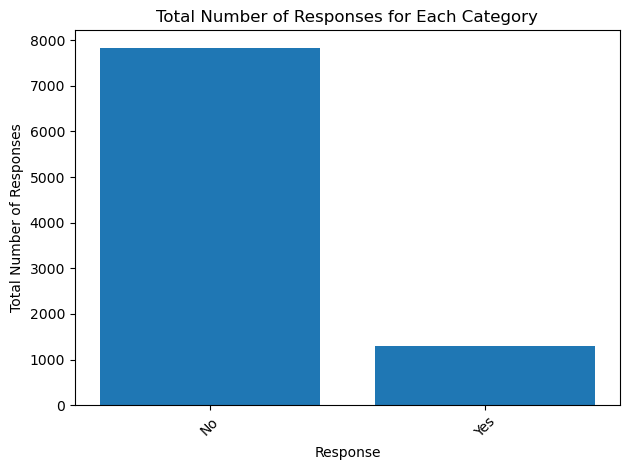

In [21]:
response_counts = data_frame['Response'].value_counts()
unique_responses = response_counts.index.tolist()
counts = response_counts.tolist()

plt.bar(unique_responses, counts)

plt.xlabel("Response")
plt.ylabel("Total Number of Responses")
plt.title("Total Number of Responses for Each Category")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- Show a plot of the response rate by the sales channel.

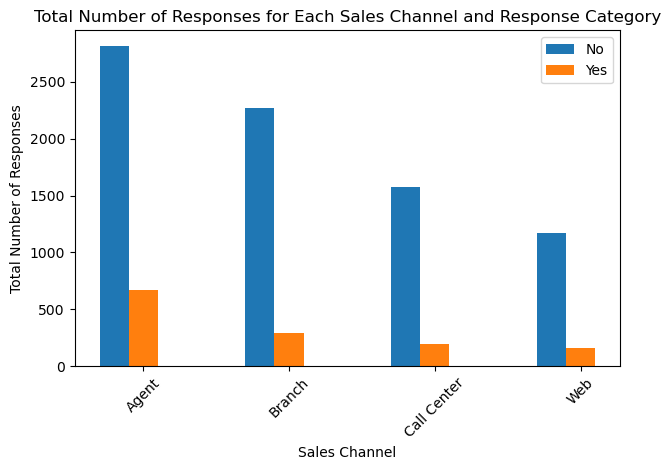

In [49]:
response_counts = data_frame.groupby(['Sales Channel', 'Response']).size().unstack(fill_value=0)

unique_responses = response_counts.columns.tolist()
unique_channels = response_counts.index.tolist()

x = range(len(unique_channels))
width = 0.2 

for i, response in enumerate(unique_responses):
    plt.bar([pos + i * width for pos in x], response_counts[response].values, width=width, label=response)

plt.xlabel("Sales Channel")
plt.ylabel("Total Number of Responses")
plt.title("Total Number of Responses for Each Sales Channel and Response Category")

plt.xticks([pos + width for pos in x], unique_channels, rotation=45)


plt.legend()
plt.tight_layout()
plt.show()



x

- Show a plot of the response rate by the total claim amount.

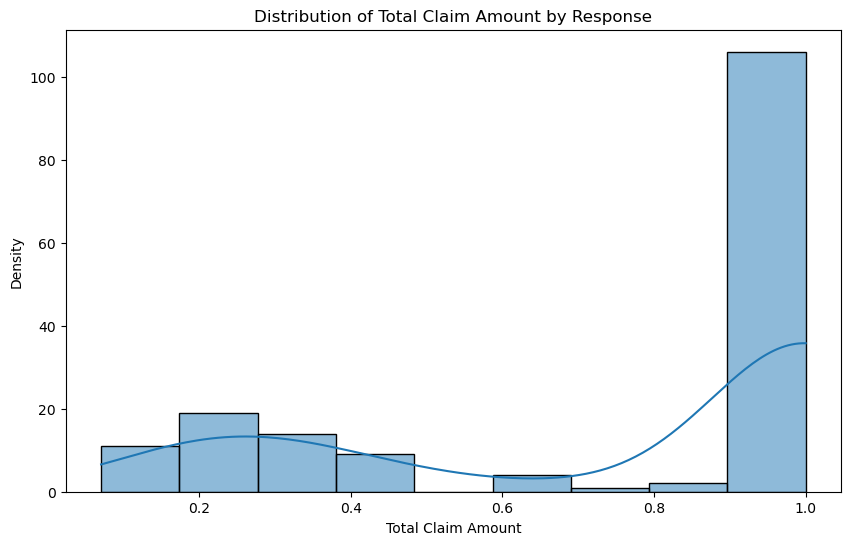

In [56]:
response_rates_TCA = data_frame[data_frame['Response'] == 'Yes']['Total Claim Amount'].value_counts() / data_frame['Total Claim Amount'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(response_rates_TCA, kde=True, label='Yes')
plt.title('Distribution of Total Claim Amount by Response')
plt.xlabel('Total Claim Amount')
plt.ylabel('Density')
plt.show()






- Show a plot of the response rate by income.

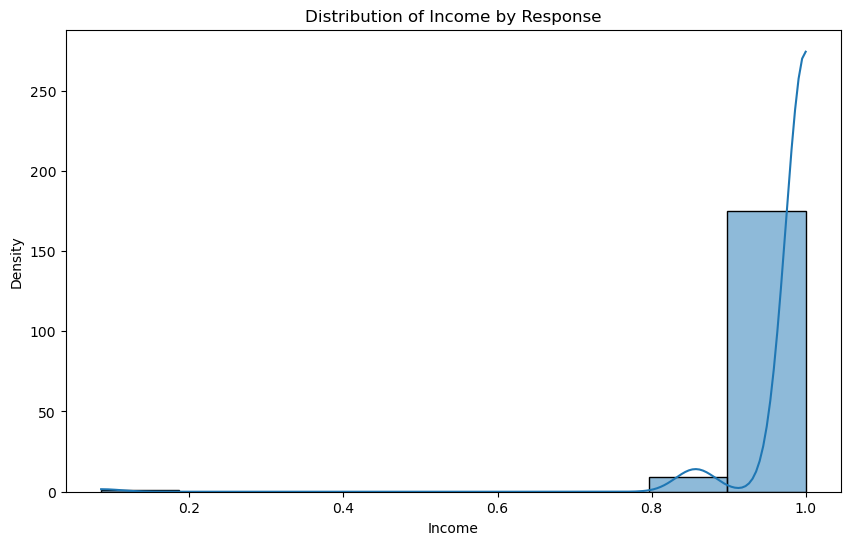

In [57]:
response_rates_TCA = data_frame[data_frame['Response'] == 'Yes']['Income'].value_counts() / data_frame['Income'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(response_rates_TCA, kde=True, label='Yes')
plt.title('Distribution of Income by Response')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()